# Setting up our Environment

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
!pip install transformers

In [ ]:
!nvidia-smi

Tue Jul  6 09:25:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    28W /  70W |   1368MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Sentiment Hello World

## Loading the Model

In [ ]:
from transformers import pipeline
# device=0 means we're loading the model to gpu
sentiment_classifier = pipeline('sentiment-analysis', device=0)

In [ ]:
sentiment_classifier.device

device(type='cuda', index=0)

## Making Predictions

In [ ]:
sentiment_classifier("This is a very good talk.")

[{'label': 'POSITIVE', 'score': 0.9998667240142822}]

In [ ]:
sentiment_classifier("This is a stupid talk.")

[{'label': 'NEGATIVE', 'score': 0.9997729063034058}]

## Model under the Hood

In [ ]:
sentiment_classifier.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [ ]:
sentiment_classifier.tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased-finetuned-sst-2-english', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
sentiment_classifier.tokenizer.tokenize('Welcome to heise Data Science day 😂. We hope you\'re enjoying it as much as we do ;-)')

['welcome',
 'to',
 'he',
 '##ise',
 'data',
 'science',
 'day',
 '[UNK]',
 '.',
 'we',
 'hope',
 'you',
 "'",
 're',
 'enjoying',
 'it',
 'as',
 'much',
 'as',
 'we',
 'do',
 ';',
 '-',
 ')']

In [ ]:
sentiment_classifier.tokenizer.encode_plus('Welcome to heise Data Science day 😂. We hope you\'re enjoying it as much as we do ;-)')['input_ids']

[101,
 6160,
 2000,
 2002,
 5562,
 2951,
 2671,
 2154,
 100,
 1012,
 2057,
 3246,
 2017,
 1005,
 2128,
 9107,
 2009,
 2004,
 2172,
 2004,
 2057,
 2079,
 1025,
 1011,
 1007,
 102]

# Loading a Bigger Model

In [ ]:
sentiment_classifier_big = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
sentiment_classifier_big("This is a very good talk.")

[{'label': '5 stars', 'score': 0.5125714540481567}]

In [ ]:
sentiment_classifier_big("This is a stupid talk.")

[{'label': '1 star', 'score': 0.8776302337646484}]

In [ ]:
sentiment_classifier_big.model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

# Using our Data

In [ ]:
data = pd.read_csv('/content/data_reddit_tech_sentiment_raw_sample.csv', sep=",")

In [ ]:
data

,id,kind,title,link_id,parent_id,name,ups,downs,score,author,num_comments,created_utc,permalink,url,selftext,body,flair,level,top_parent
0,t3_kxwsat,t3,Rare car tech,NaN,NaN,t3_kxwsat,1.0,0.0,1.0,mjohnssy2,1.0,2021-01-15 16:30:39.000000,/r/technology/comments/kxwsat/rare_car_tech/,https://www.youtube.com/watch?v=2TVCUNKxqkk,NaN,NaN,Hardware,0.0,t3_kxwsat
1,t1_gjcnro9,t1,NaN,t3_kxwsat,t3_kxwsat,t1_gjcnro9,1.0,0.0,1.0,AutoModerator,NaN,2021-01-15 16:30:40.000000,/r/technology/comments/kxwsat/rare_car_tech/gj...,NaN,NaN,"Unfortunately, this post has been removed. Ima...",NaN,NaN,t3_kxwsat
2,t3_kr2ntr,t3,The Device That Turns A Normal Bike Into An El...,NaN,NaN,t3_kr2ntr,1.0,0.0,1.0,[deleted],1.0,2021-01-05 18:10:25.000000,/r/technology/comments/kr2ntr/the_device_that_...,https://bitarafhaber.net/normal-bir-bisikleti-...,[deleted],NaN,Hardware,0.0,t3_kr2ntr
3,t1_gi73uir,t1,NaN,t3_kr2ntr,t3_kr2ntr,t1_gi73uir,1.0,0.0,1.0,AutoModerator,NaN,2021-01-05 18:10:26.000000,/r/technology/comments/kr2ntr/the_device_that_...,NaN,NaN,Hello! **Please read this message very careful...,NaN,NaN,t3_kr2ntr
4,t3_kon7vd,t3,Why can't we build flying craft that is as qui...,NaN,NaN,t3_kon7vd,1.0,0.0,1.0,FtheIneffable,1.0,2021-01-02 01:53:00.000000,/r/technology/comments/kon7vd/why_cant_we_buil...,https://www.reddit.com/r/technology/comments/k...,[removed],NaN,Transportation,0.0,t3_kon7vd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,t1_d05z4hc,t1,NaN,t3_46kj2y,t1_d05xfkr,t1_d05z4hc,3.0,0.0,3.0,nhammen,NaN,2016-02-19 17:19:46.000000,/r/technology/comments/46kj2y/the_kochs_are_pl...,NaN,NaN,"But Musk is Money and Science type, and we all...",NaN,NaN,t3_46kj2y
10000,t1_d065dop,t1,NaN,t3_46kj2y,t1_d05z4hc,t1_d065dop,3.0,0.0,3.0,xmlns,NaN,2016-02-19 19:41:44.000000,/r/technology/comments/46kj2y/the_kochs_are_pl...,NaN,NaN,both the Koch brothers have masters degrees in...,NaN,NaN,t3_46kj2y
10001,t1_d05zo0w,t1,NaN,t3_46kj2y,t1_d05z4hc,t1_d05zo0w,3.0,0.0,3.0,Nakotadinzeo,NaN,2016-02-19 17:32:14.000000,/r/technology/comments/46kj2y/the_kochs_are_pl...,NaN,NaN,Tesla uses innovation... \n\nIt's super effec...,NaN,NaN,t3_46kj2y
10002,t1_d060rus,t1,NaN,t3_46kj2y,t1_d05xfkr,t1_d060rus,1.0,0.0,1.0,TaviRider,NaN,2016-02-19 17:57:11.000000,/r/technology/comments/46kj2y/the_kochs_are_pl...,NaN,NaN,Bags of money are always super effective.,NaN,NaN,t3_46kj2y


In [ ]:
data = data.dropna(subset=['body'])
data = data.reset_index(drop=True)

In [ ]:
format = "%Y-%m-%d %H:%M:%S.%f"
data['time'] = data['created_utc'].apply(lambda x: 
                                    dt.datetime.strptime(x,format))
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

In [ ]:
data

,id,kind,title,link_id,parent_id,name,ups,downs,score,author,num_comments,created_utc,permalink,url,selftext,body,flair,level,top_parent,time,year,month,day
0,t1_gjcnro9,t1,NaN,t3_kxwsat,t3_kxwsat,t1_gjcnro9,1.0,0.0,1.0,AutoModerator,NaN,2021-01-15 16:30:40.000000,/r/technology/comments/kxwsat/rare_car_tech/gj...,NaN,NaN,"Unfortunately, this post has been removed. Ima...",NaN,NaN,t3_kxwsat,2021-01-15 16:30:40,2021,1,15
1,t1_gi73uir,t1,NaN,t3_kr2ntr,t3_kr2ntr,t1_gi73uir,1.0,0.0,1.0,AutoModerator,NaN,2021-01-05 18:10:26.000000,/r/technology/comments/kr2ntr/the_device_that_...,NaN,NaN,Hello! **Please read this message very careful...,NaN,NaN,t3_kr2ntr,2021-01-05 18:10:26,2021,1,5
2,t1_ghs2782,t1,NaN,t3_kon7vd,t3_kon7vd,t1_ghs2782,1.0,0.0,1.0,AutoModerator,NaN,2021-01-02 01:53:00.000000,/r/technology/comments/kon7vd/why_cant_we_buil...,NaN,NaN,Text posts are exclusively for discussion and ...,NaN,NaN,t3_kon7vd,2021-01-02 01:53:00,2021,1,2
3,t1_ghk9kye,t1,NaN,t3_kng7cx,t3_kng7cx,t1_ghk9kye,1.0,0.0,1.0,AutoModerator,NaN,2020-12-31 02:52:39.000000,/r/technology/comments/kng7cx/google_maps_moat...,NaN,NaN,"Thank you for your submission, but due to the ...",NaN,NaN,t3_kng7cx,2020-12-31 02:52:39,2020,12,31
4,t1_ghi1ax5,t1,NaN,t3_kmyscd,t3_kmyscd,t1_ghi1ax5,33.0,0.0,33.0,pepinho89,NaN,2020-12-30 15:24:48.000000,/r/technology/comments/kmyscd/us_to_allow_smal...,NaN,NaN,I wonder how close a drone has to get to priva...,NaN,NaN,t3_kmyscd,2020-12-30 15:24:48,2020,12,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9507,t1_d05z4hc,t1,NaN,t3_46kj2y,t1_d05xfkr,t1_d05z4hc,3.0,0.0,3.0,nhammen,NaN,2016-02-19 17:19:46.000000,/r/technology/comments/46kj2y/the_kochs_are_pl...,NaN,NaN,"But Musk is Money and Science type, and we all...",NaN,NaN,t3_46kj2y,2016-02-19 17:19:46,2016,2,19
9508,t1_d065dop,t1,NaN,t3_46kj2y,t1_d05z4hc,t1_d065dop,3.0,0.0,3.0,xmlns,NaN,2016-02-19 19:41:44.000000,/r/technology/comments/46kj2y/the_kochs_are_pl...,NaN,NaN,both the Koch brothers have masters degrees in...,NaN,NaN,t3_46kj2y,2016-02-19 19:41:44,2016,2,19
9509,t1_d05zo0w,t1,NaN,t3_46kj2y,t1_d05z4hc,t1_d05zo0w,3.0,0.0,3.0,Nakotadinzeo,NaN,2016-02-19 17:32:14.000000,/r/technology/comments/46kj2y/the_kochs_are_pl...,NaN,NaN,Tesla uses innovation... \n\nIt's super effec...,NaN,NaN,t3_46kj2y,2016-02-19 17:32:14,2016,2,19
9510,t1_d060rus,t1,NaN,t3_46kj2y,t1_d05xfkr,t1_d060rus,1.0,0.0,1.0,TaviRider,NaN,2016-02-19 17:57:11.000000,/r/technology/comments/46kj2y/the_kochs_are_pl...,NaN,NaN,Bags of money are always super effective.,NaN,NaN,t3_46kj2y,2016-02-19 17:57:11,2016,2,19


In [ ]:
sentiment_classifier.tokenizer.max_len_single_sentence

510

In [ ]:
from transformers.tokenization_utils import TruncationStrategy

In [ ]:
data['sentiment'] = data['body'].apply(lambda body: sentiment_classifier(body, truncation=TruncationStrategy.ONLY_FIRST)[0]['label'])

In [ ]:
data[['body', 'sentiment']].to_dict(orient='records')[:5]

[{'body': 'Unfortunately, this post has been removed. Image and video based submissions are not allowed by /r/technology.\n\nPlease try submitting to /r/TechnologyPorn, /r/Pics, /r/Gifs, or another image-based subreddit. Make sure to read the sidebar there! For videos, please try submitting to /r/Videos, /r/Video, /r/Documentaries, or another video-based subreddit.\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/technology) if you have any questions or concerns.*',
  'sentiment': 'NEGATIVE'},
 {'body': 'Hello! **Please read this message very carefully.**\n\nUnfortunately, since [your account has less than 10 combined karma](/u/me) and spam from new accounts makes up a significant portion of all spam, your post was automatically, temporarily removed. **Have a tech support question?** Please head over to /r/techsupport, /r/asktechnology, or other tech-centric subreddits listed on the sidebar.\n\nYou ma

In [ ]:
data['positive'] = data['sentiment'] == 'POSITIVE'
data['negative'] = data['sentiment'] == 'NEGATIVE'

In [ ]:
sentiment_over_time = data.groupby(['year','month'])['positive','negative'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


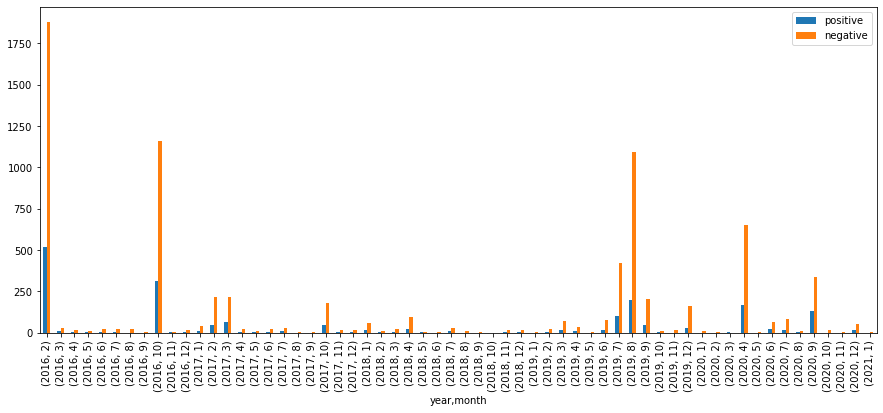

In [ ]:
sentiment_over_time.plot.bar(figsize=(15,6))

In [ ]:
most_voted_authors = data.groupby('author')['id'].count().sort_values(ascending=False)

In [ ]:
most_voted_authors[:10]

author
[deleted]        1161
AutoModerator     103
playaspec          44
BobOki             27
Drogans            26
happyscrappy       25
dnew               24
WhiteRaven42       23
vasilenko93        21
BoiledPNutz        21
Name: id, dtype: int64

In [ ]:
top3_authors = list(most_voted_authors.index[2:5])
top3_authors

['playaspec', 'BobOki', 'Drogans']

In [ ]:
author_sentiment = data[data['author'].isin(top3_authors)].groupby(['author'])['negative','positive'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
author_sentiment

,negative,positive
author,,
BobOki,22,5
Drogans,25,1
playaspec,38,6


# Finetuning our Model

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("imdb")

Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a)


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

In [ ]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))
full_train_dataset = tokenized_datasets["train"]
full_eval_dataset = tokenized_datasets["test"]

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english', num_labels=2)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer")
training_args.per_device_train_batch_size=32

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=small_train_dataset, eval_dataset=small_eval_dataset
)

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 1000
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 96


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=96, training_loss=0.1693516174952189, metrics={'train_runtime': 157.6695, 'train_samples_per_second': 19.027, 'train_steps_per_second': 0.609, 'total_flos': 617057372160000.0, 'train_loss': 0.1693516174952189, 'epoch': 3.0})

In [ ]:
trainer.save_model('/content/model_v2')

Saving model checkpoint to /content/model_v2
Configuration saved in /content/model_v2/config.json
Model weights saved in /content/model_v2/pytorch_model.bin


In [ ]:
tokenizer.save_pretrained('/content/model_v2')

tokenizer config file saved in /content/model_v2/tokenizer_config.json
Special tokens file saved in /content/model_v2/special_tokens_map.json


('/content/model_v2/tokenizer_config.json',
 '/content/model_v2/special_tokens_map.json',
 '/content/model_v2/vocab.txt',
 '/content/model_v2/added_tokens.json',
 '/content/model_v2/tokenizer.json')

In [ ]:
!tar -cf model_v2.tar model_v2/*

In [ ]:
!du -h model_v2.tar

257M	model_v2.tar


# Domain Adaptation and Training your own Model

Unfortunately we cannot go into details here for building your own domain model. However there are great examples out there you can use and adapt to your own needs.

For domain adaptation and training from scratch check out deepset's FARM library. Examples for domain adaptation (training on an existing pretrained model) can be found under https://github.com/deepset-ai/FARM/blob/master/examples/lm_finetuning.py. Likewise there's an example for training a bare model (training from scratch) under https://github.com/deepset-ai/FARM/blob/master/examples/train_from_scratch.py.

In order create your own Tokenizer including your own domain vocabulary check out Google's SentencePiece libary under https://github.com/google/sentencepiece. 